# Step 0: Imports and Reading Data

In [131]:
import pandas as pd
import numpy as np  # Fix the import statement for numpy
import matplotlib.pyplot as plt  # Fix the import statement for matplotlib.pyplot
import seaborn as sns
import scipy

plt.style.use('ggplot')
pd.options.display.max_columns = 200


# Step 1: Data Understanding

In [74]:
df = pd.read_csv('coaster_db.csv')

In [75]:
df.shape

(1087, 56)

In [76]:
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 2 across in ...,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,Switchback Railway,NaN,NaN,NaN,1910,NaN,Giant Racer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [77]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [78]:
df.dtypes

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

In [79]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


# Step 2: Data Preparation

In [80]:
df = df[['coaster_name', 
    #'Length', 'Speed', 
    'Location', 'Status', 
    #'Opening date',
       #'Type', 
       'Manufacturer', 
       #'Height restriction', 'Model', 'Height',
       #'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       #'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       #'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       #'Track layout', 'Fastrack available', 'Soft opening date.1',
       #'Closing date', 'Opened', 'Replaced by', 'Website',
       #'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       #'Single rider line available', 'Restraint Style',
       #'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 
       'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 
       #'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 
       #'height_value', 'height_unit', 
       'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()

In [82]:
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])
df.head()

,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [83]:
df.dtypes

coaster_name                  object
Location                      object
Status                        object
Manufacturer                  object
year_introduced                int64
latitude                     float64
longitude                    float64
Type_Main                     object
opening_date_clean    datetime64[ns]
speed_mph                    float64
height_ft                    float64
Inversions_clean               int64
Gforce_clean                 float64
dtype: object

# rename de columns

In [84]:
df.columns

Index(['coaster_name', 'Location', 'Status', 'Manufacturer', 'year_introduced',
       'latitude', 'longitude', 'Type_Main', 'opening_date_clean', 'speed_mph',
       'height_ft', 'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [89]:
df = df.rename(columns={'coaster_name':'Coaster_Name','year_introduced':'Year_Introduced','latitude':'Latitude','longitude':'Longitude','opening_date_clean':'Opening_Date_Clean','Inversions_clean':'Inversion_Clean','speed_mph':'Speed_MPH','height_ft':'Height_ft','Gforce_clean':'Gforce_Clean'})

In [90]:
df.head()

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date_Clean,Speed_MPH,Height_ft,Inversion_Clean,Gforce_Clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [93]:
df.isna()

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date_Clean,Speed_MPH,Height_ft,Inversion_Clean,Gforce_Clean
0,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,True,True,False,False
2,False,False,False,True,False,False,False,False,True,True,True,False,True
3,False,False,False,False,False,False,False,False,False,True,True,False,True
4,False,False,False,False,False,False,False,False,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,False,False,True,False,False,True,True,False,True,False,True,False,False
1083,False,False,False,False,False,False,False,False,False,False,True,False,True
1084,False,False,True,False,False,True,True,False,False,False,True,False,False
1085,False,False,False,False,False,True,True,False,True,False,True,False,True


In [94]:
df.isna().sum()

Coaster_Name            0
Location                0
Status                213
Manufacturer           59
Year_Introduced         0
Latitude              275
Longitude             275
Type_Main               0
Opening_Date_Clean    250
Speed_MPH             150
Height_ft             916
Inversion_Clean         0
Gforce_Clean          725
dtype: int64

In [95]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1082    False
1083    False
1084    False
1085    False
1086    False
Length: 1087, dtype: bool

In [96]:
df.loc[df.duplicated()]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date_Clean,Speed_MPH,Height_ft,Inversion_Clean,Gforce_Clean


In [98]:
df.loc[df.duplicated(subset=['Coaster_Name'])].head(5)

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date_Clean,Speed_MPH,Height_ft,Inversion_Clean,Gforce_Clean
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN


In [99]:
df.query('Coaster_Name == "Crystal Beach Cyclone"')

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date_Clean,Speed_MPH,Height_ft,Inversion_Clean,Gforce_Clean
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [100]:
df.columns

Index(['Coaster_Name', 'Location', 'Status', 'Manufacturer', 'Year_Introduced',
       'Latitude', 'Longitude', 'Type_Main', 'Opening_Date_Clean', 'Speed_MPH',
       'Height_ft', 'Inversion_Clean', 'Gforce_Clean'],
      dtype='object')

In [104]:
df.duplicated(subset=['Coaster_Name','Location','Opening_Date_Clean']).sum()

97

In [110]:
df = df.loc[~df.duplicated(subset=['Coaster_Name','Location','Opening_Date_Clean'])]\
    .reset_index(drop=True).copy()

In [113]:
df.head()

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date_Clean,Speed_MPH,Height_ft,Inversion_Clean,Gforce_Clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [112]:
df.shape

(990, 13)

# Step 3: Feature Understanding

#### Univariate Analysis

In [115]:
df['Year_Introduced'].value_counts()

Year_Introduced
1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1956     1
1959     1
1961     1
1895     1
1884     1
Name: count, Length: 101, dtype: int64

Text(0, 0.5, 'Count')

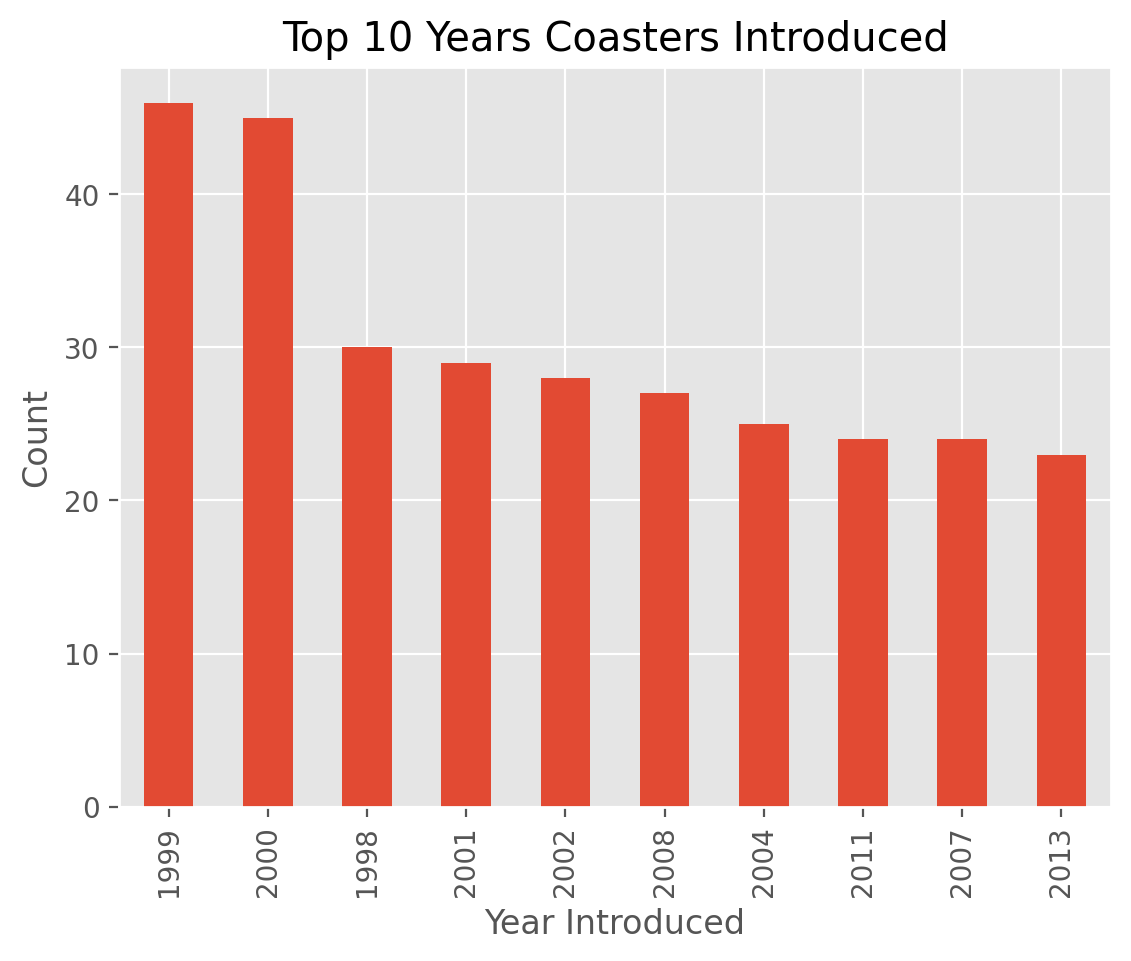

In [122]:
ax = df['Year_Introduced'].value_counts().head(10).plot(kind='bar', title='Top 10 Years Coasters Introduced')
ax.set_xlabel('Year Introduced')
ax.set_ylabel('Count')

Text(0.5, 0, 'Speed (mph)')

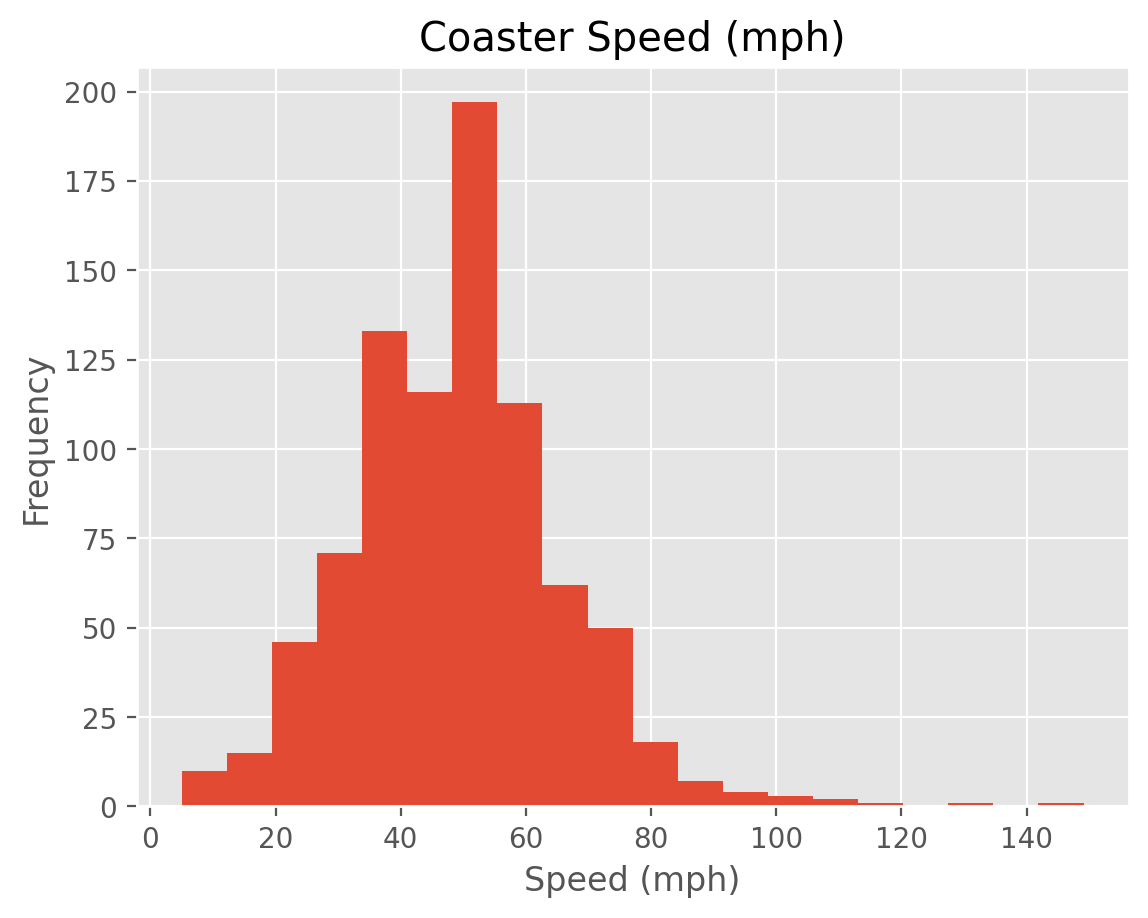

In [128]:
ax = df['Speed_MPH'].plot(kind='hist',bins=20,title='Coaster Speed (mph)')
ax.set_xlabel('Speed (mph)')

Text(0.5, 0, 'Speed (mph)')

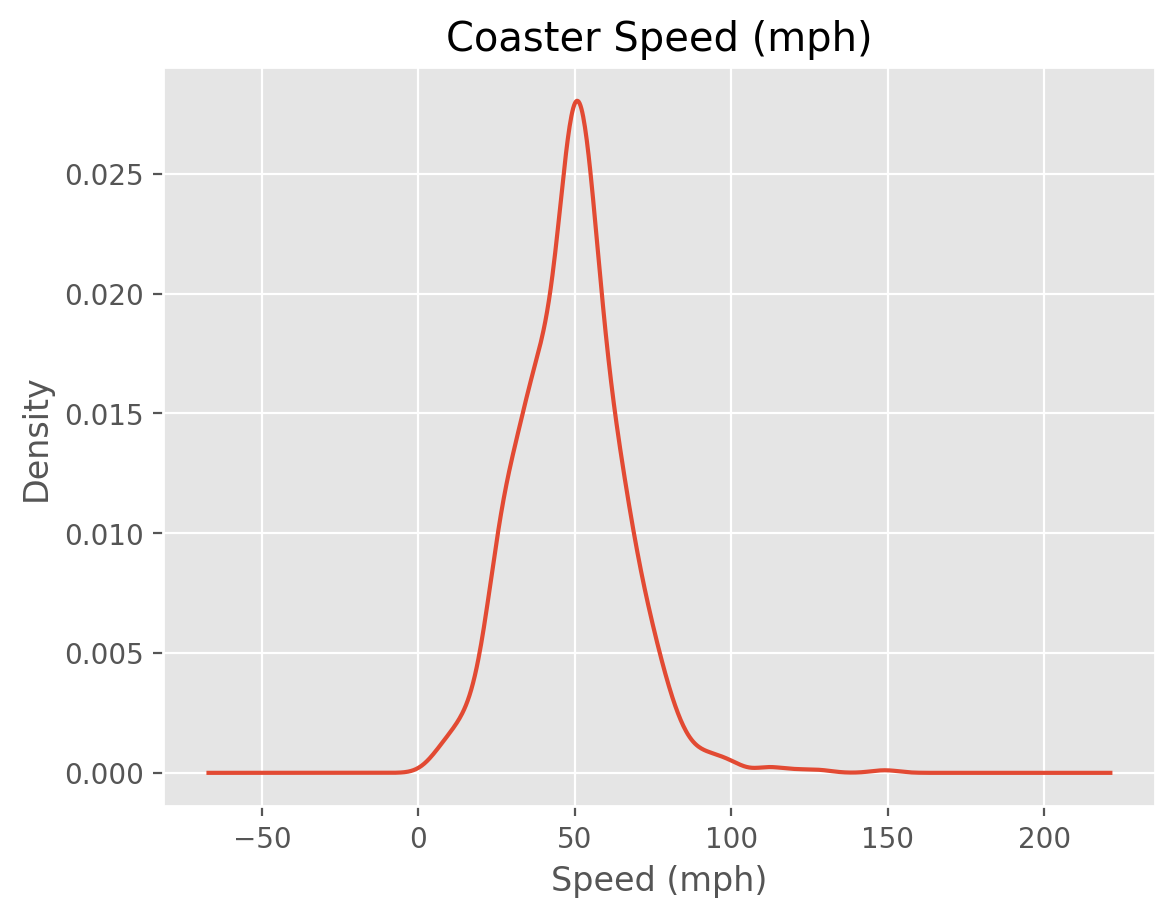

In [132]:
ax = df['Speed_MPH'].plot(kind='kde',title='Coaster Speed (mph)')
ax.set_xlabel('Speed (mph)')

# Step 4: Feature Relationships

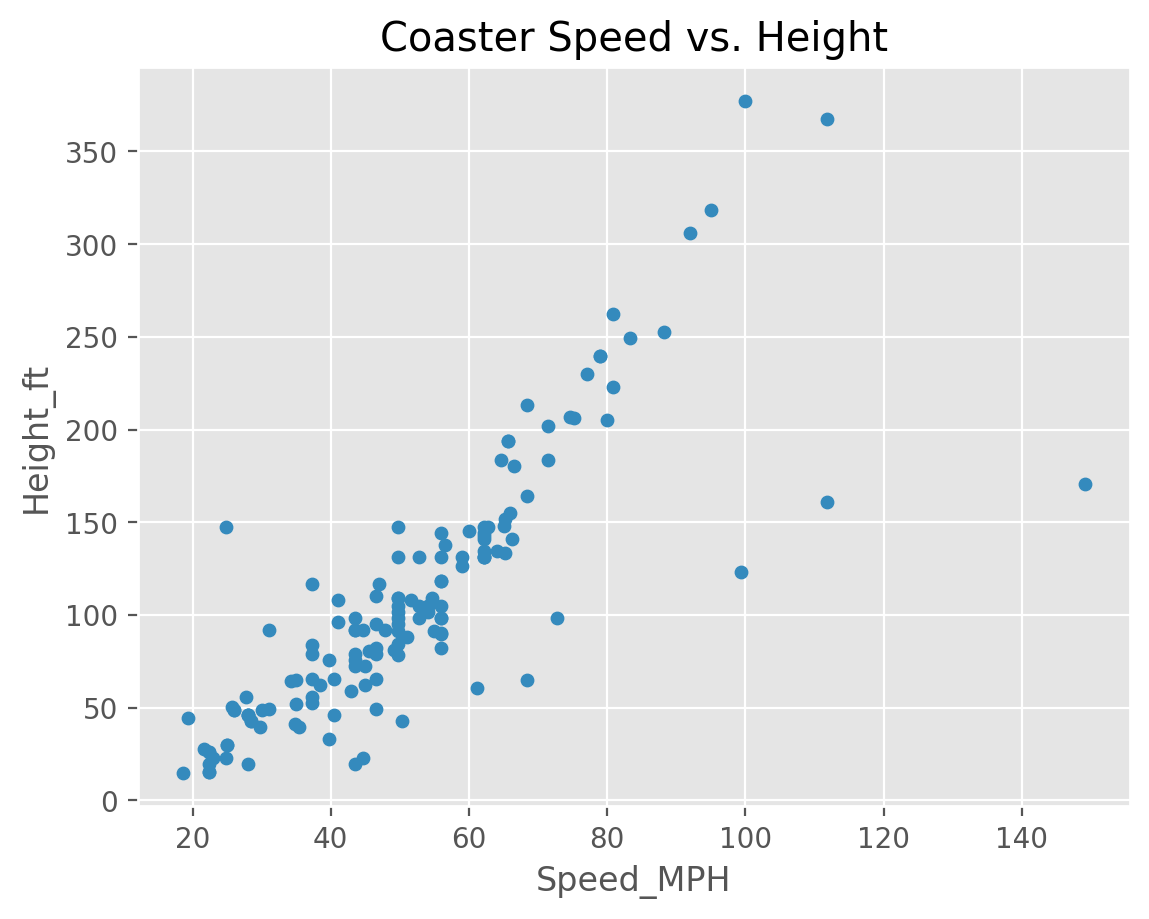

In [136]:
df.plot(kind='scatter',x='Speed_MPH',y='Height_ft',title='Coaster Speed vs. Height')
plt.show()

In [139]:
df

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date_Clean,Speed_MPH,Height_ft,Inversion_Clean,Gforce_Clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Premier Rides,2022,28.4088,-81.4633,Steel,2022-02-01,52.0,NaN,0,NaN
986,Leviathan (Sea World),Sea World,Under construction,Martin & Vleminckx,2022,-27.9574,153.4263,Wood,2022-01-01,49.7,105.0,0,NaN
987,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
988,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


<Axes: xlabel='Speed_MPH', ylabel='Height_ft'>

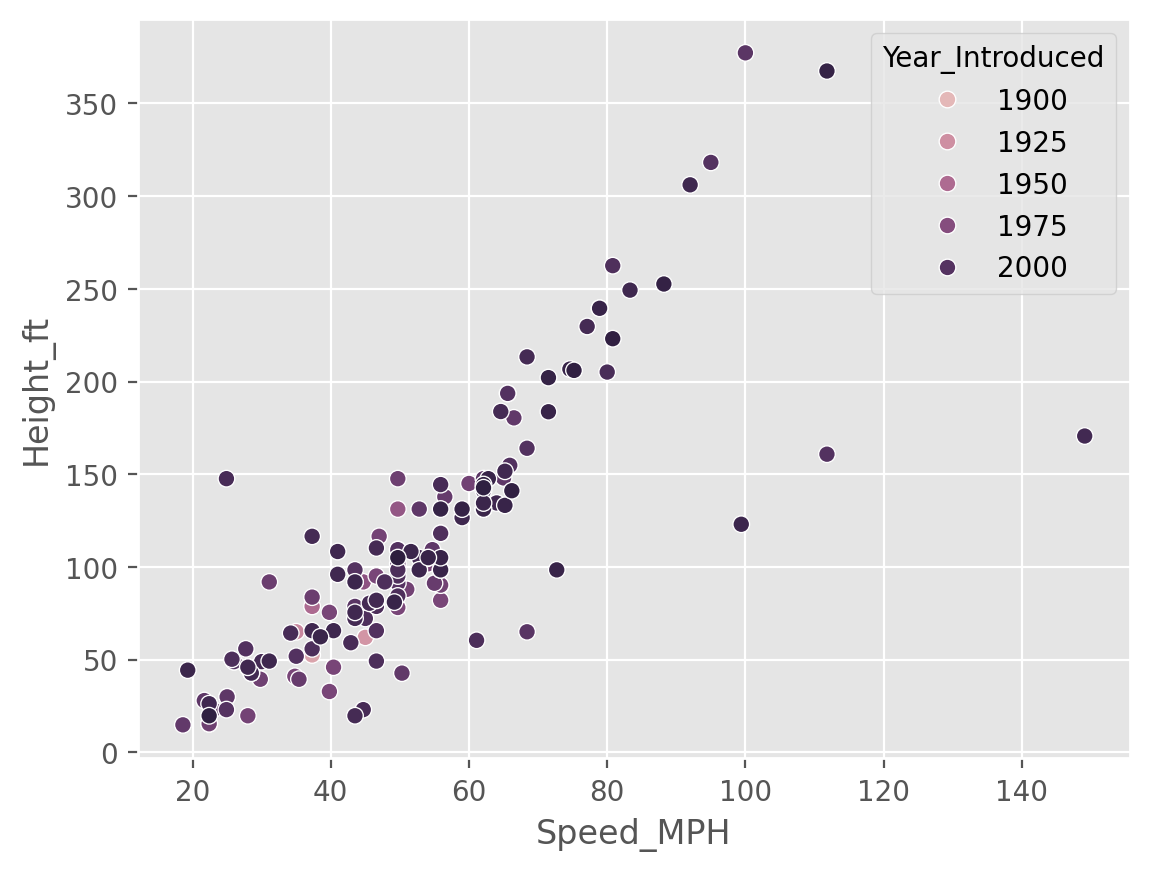

In [140]:
sns.scatterplot(x='Speed_MPH',y='Height_ft',data=df,hue='Year_Introduced')

In [147]:
df.head(50)

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date_Clean,Speed_MPH,Height_ft,Inversion_Clean,Gforce_Clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.90
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.00
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
5,Cannon Coaster,Coney Island,Removed,George Francis Meyer,1902,40.5750,-73.9800,Wood,1902-01-01,NaN,NaN,0,NaN
6,Leap-The-Dips,Lakemont Park,Operating,Federal Construction Company,1902,NaN,NaN,Wood,1902-01-01,10.0,NaN,0,NaN
7,Figure Eight (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1904,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
8,Drop the Dip,Coney Island,Removed,Arthur Jarvis,1907,40.5744,-73.9786,Other,1907-06-06,NaN,NaN,0,NaN
9,Scenic Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1907,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN


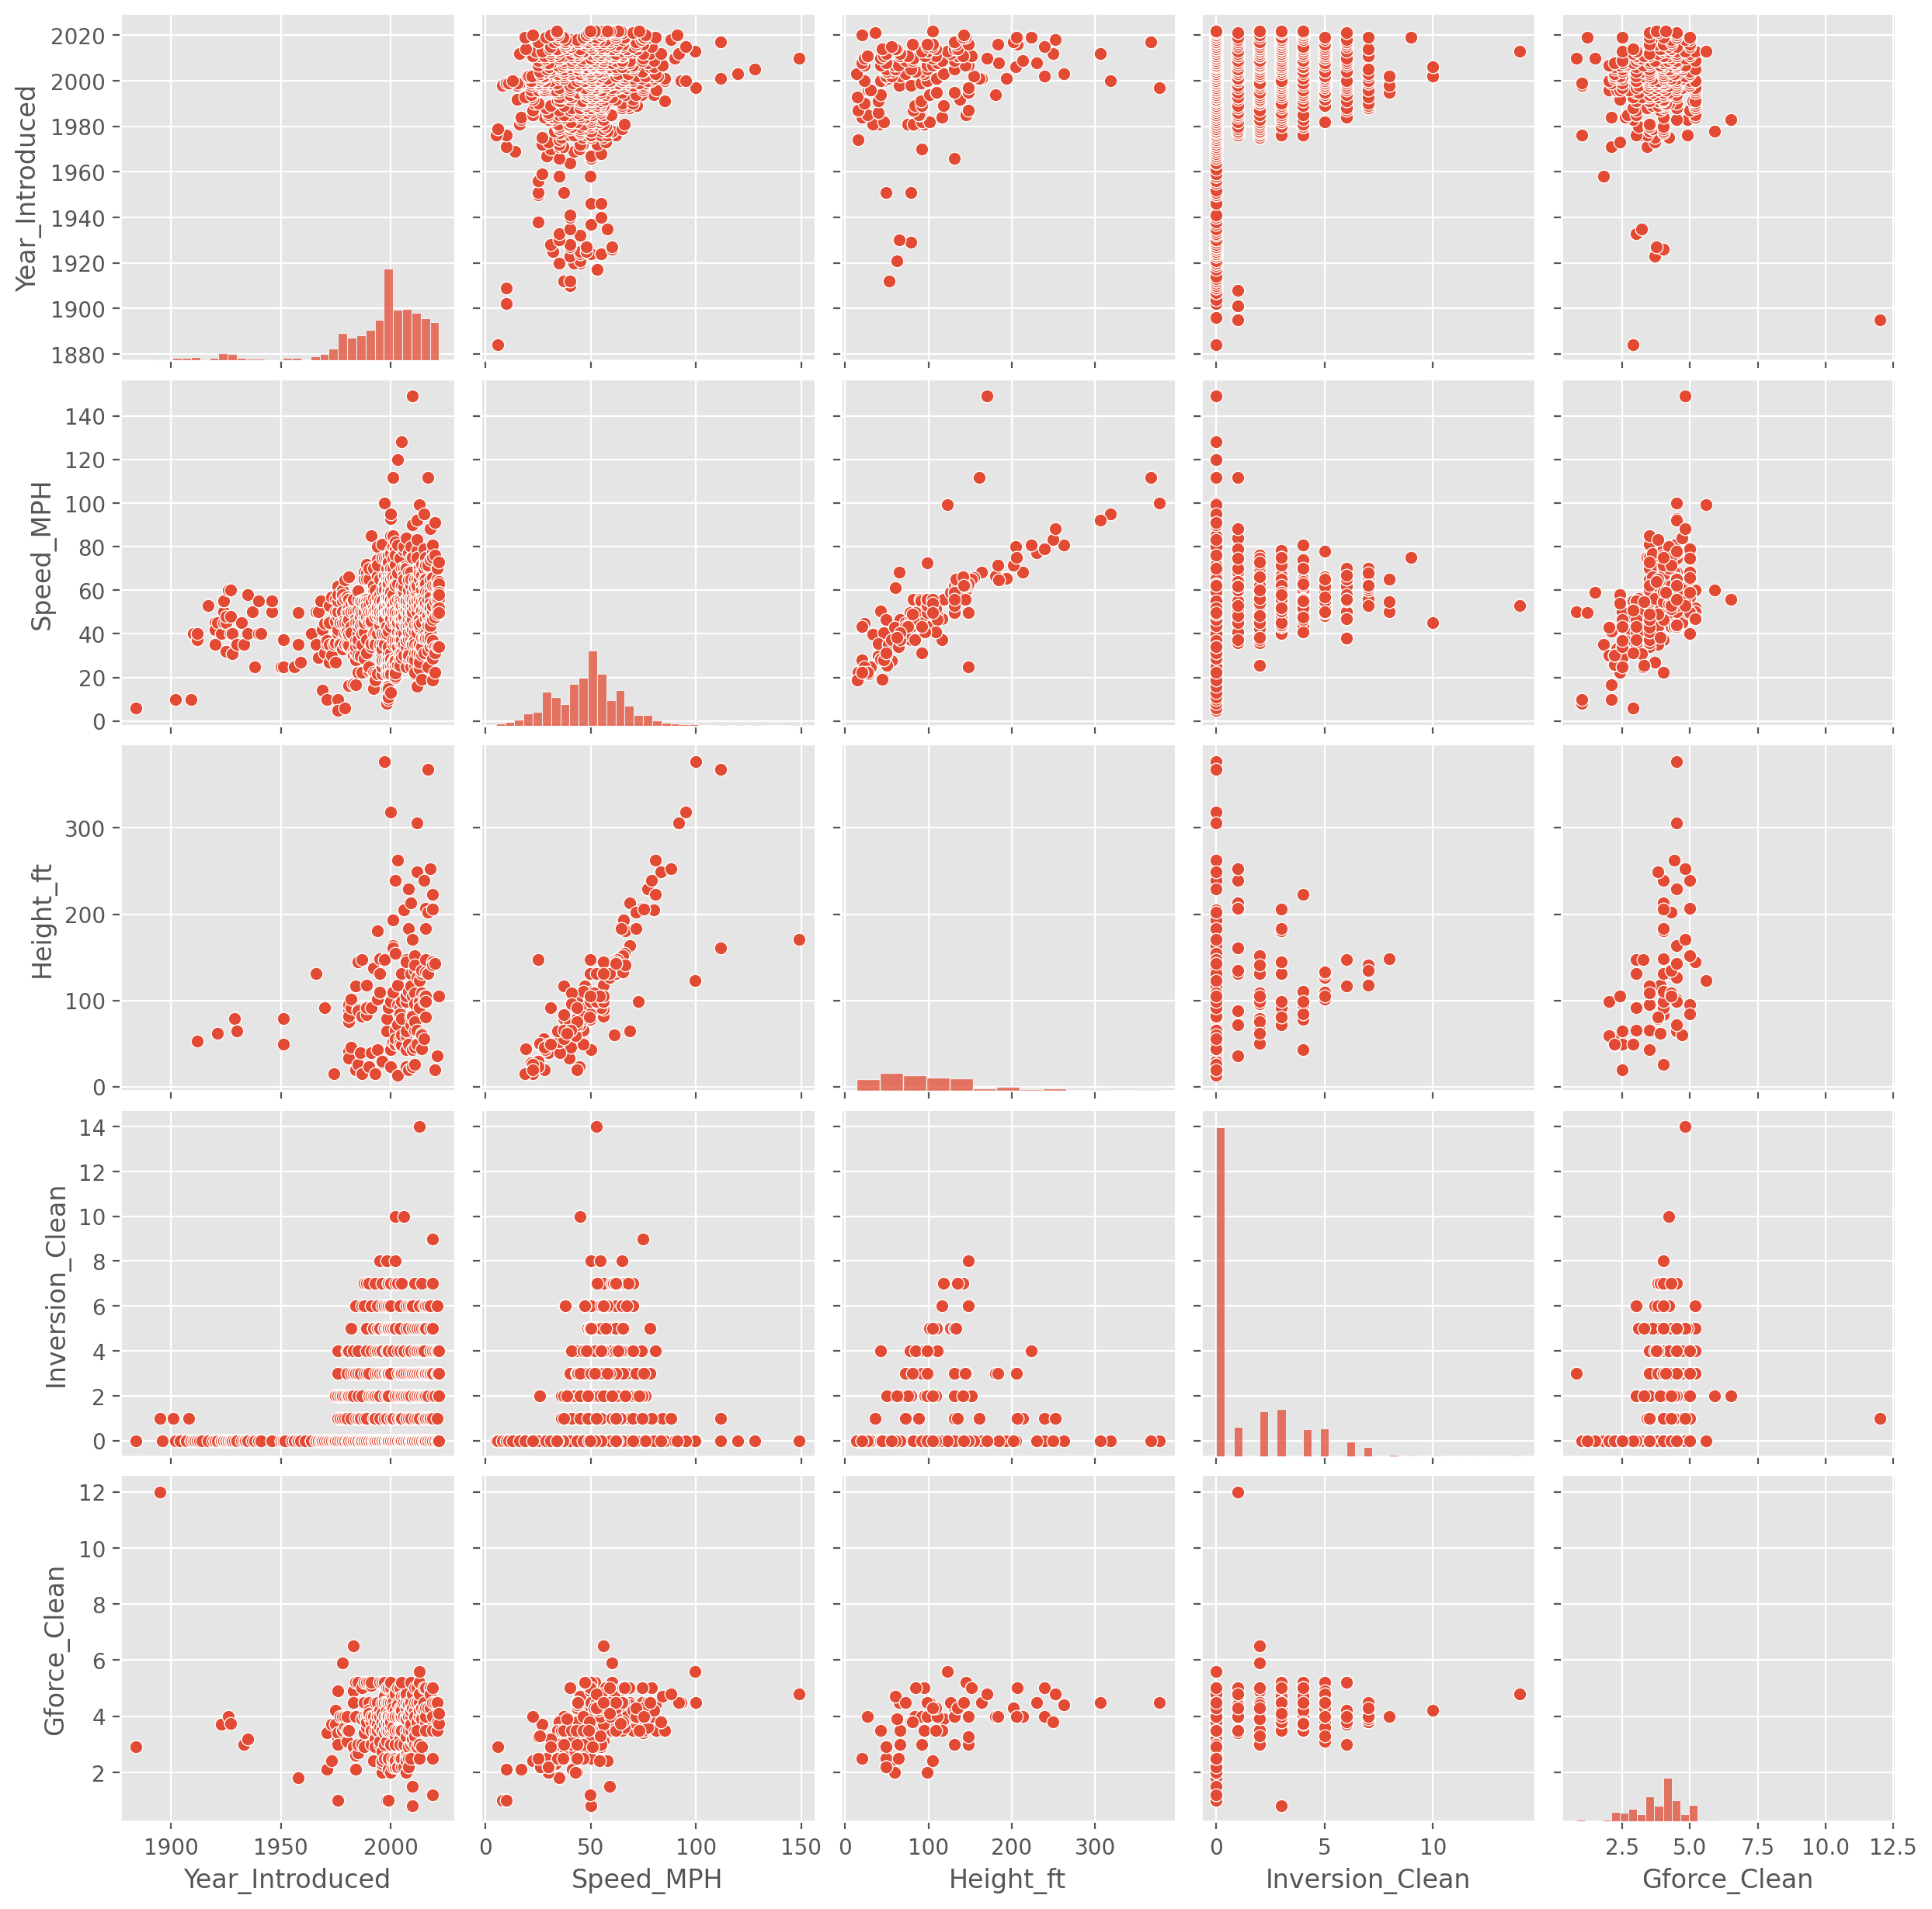

In [144]:
sns.pairplot(df, vars=['Year_Introduced','Speed_MPH','Height_ft','Inversion_Clean','Gforce_Clean'])
plt.show()

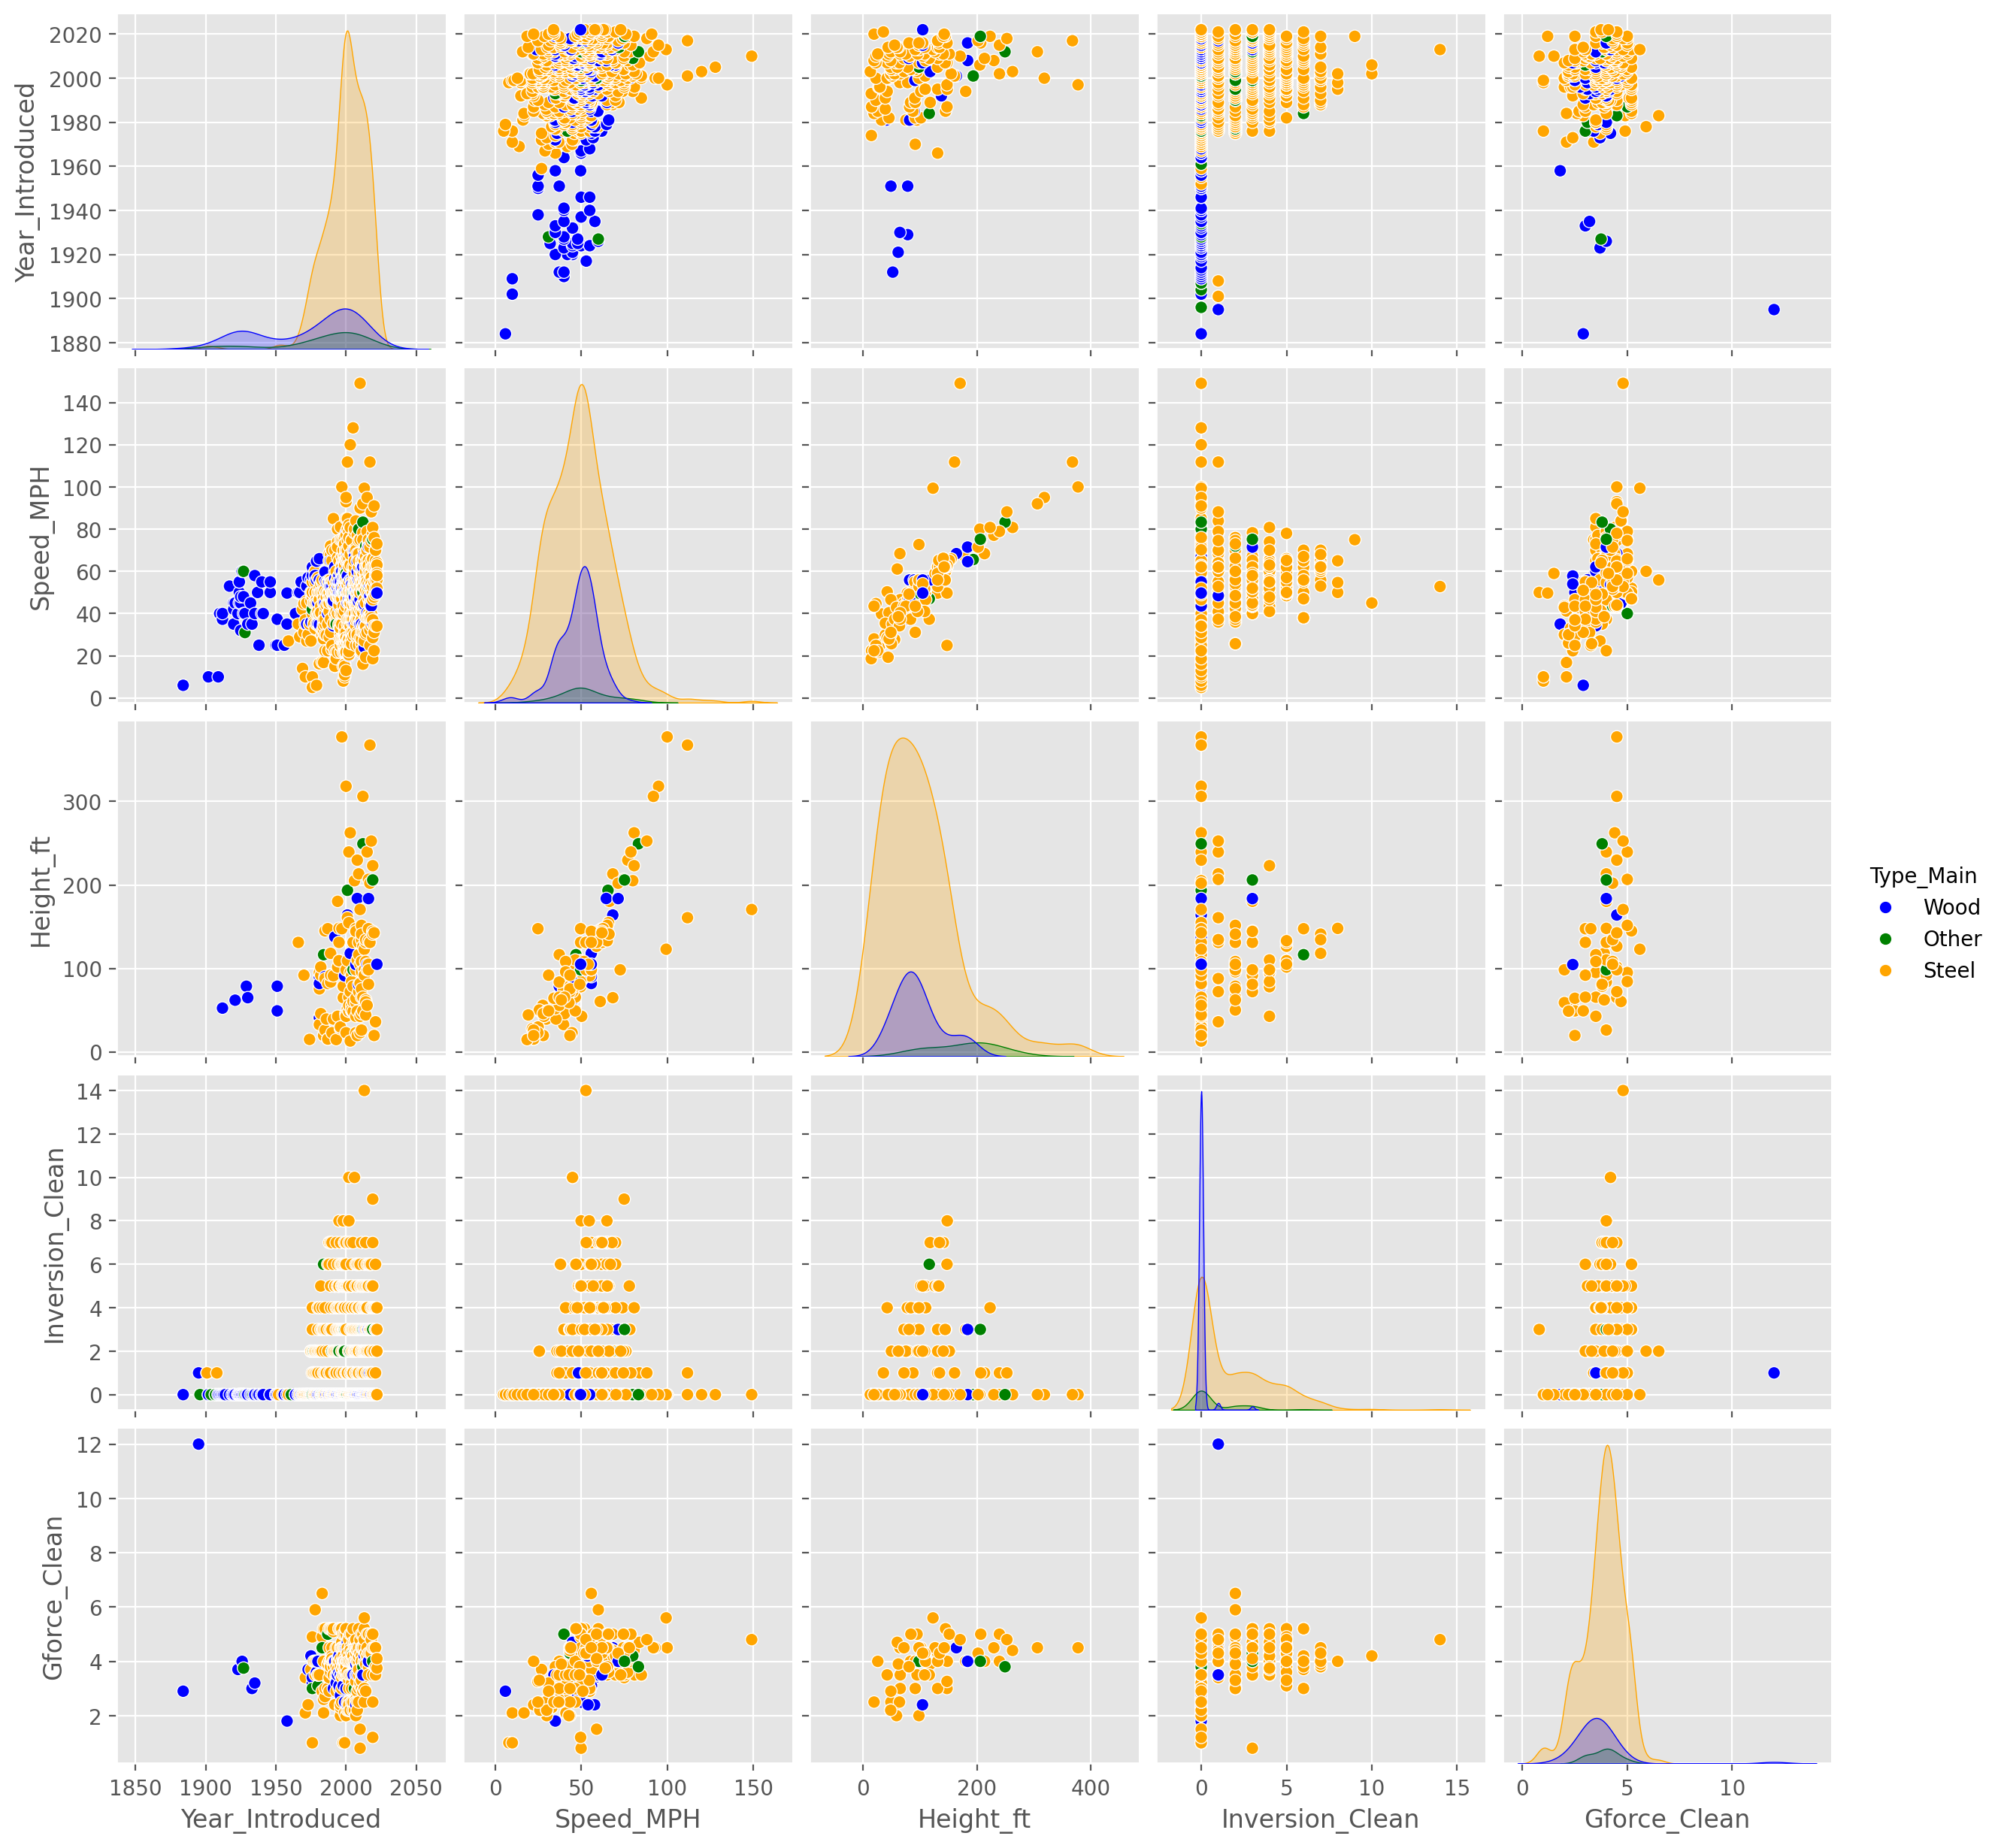

In [148]:
# Choose a color palette (you can choose from predefined palettes or create your own)
custom_palette = {'Wood': 'blue', 'Steel': 'orange', 'Other': 'green'}

# Use the pairplot with the specified hue and palette
sns.pairplot(df, vars=['Year_Introduced', 'Speed_MPH', 'Height_ft', 'Inversion_Clean', 'Gforce_Clean'], hue='Type_Main', palette=custom_palette)
plt.show()

In [149]:
df

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date_Clean,Speed_MPH,Height_ft,Inversion_Clean,Gforce_Clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Premier Rides,2022,28.4088,-81.4633,Steel,2022-02-01,52.0,NaN,0,NaN
986,Leviathan (Sea World),Sea World,Under construction,Martin & Vleminckx,2022,-27.9574,153.4263,Wood,2022-01-01,49.7,105.0,0,NaN
987,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
988,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


In [157]:
df_corr = df[['Year_Introduced','Speed_MPH','Height_ft','Inversion_Clean','Gforce_Clean']].dropna().corr()
df_corr

,Year_Introduced,Speed_MPH,Height_ft,Inversion_Clean,Gforce_Clean
Year_Introduced,1.000000,0.171978,0.135413,-0.209887,0.160247
Speed_MPH,0.171978,1.000000,0.733999,-0.028705,0.607383
Height_ft,0.135413,0.733999,1.000000,-0.079736,0.466482
Inversion_Clean,-0.209887,-0.028705,-0.079736,1.000000,0.275991
Gforce_Clean,0.160247,0.607383,0.466482,0.275991,1.000000


<Axes: >

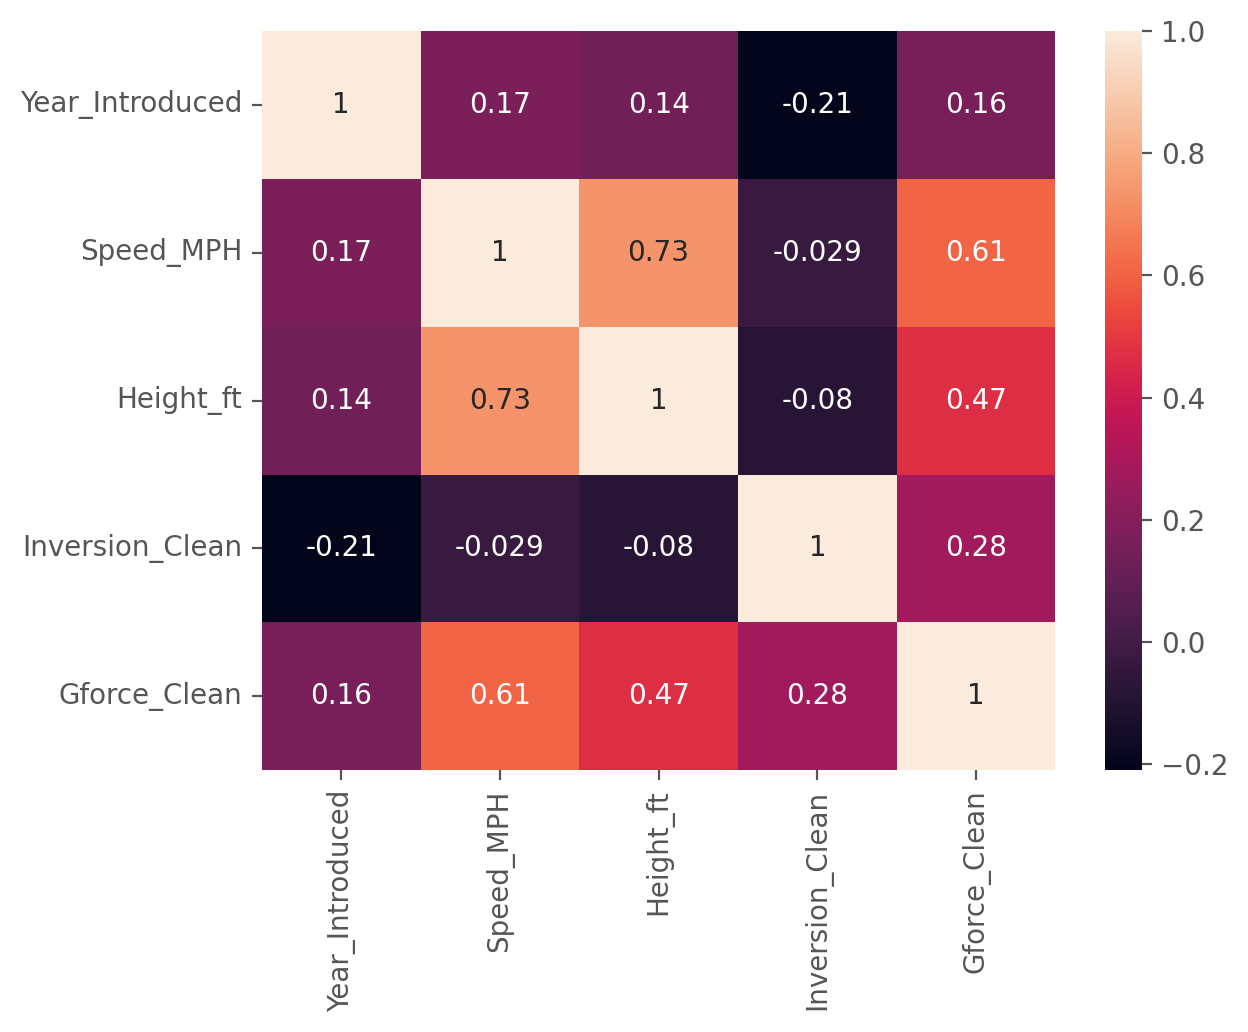

In [159]:
sns.heatmap(df_corr,annot=True)

# Step 5: Ask Questions about the Data

What are the locations with the fastest roller coasters (min 10)?

In [160]:
df.head()

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date_Clean,Speed_MPH,Height_ft,Inversion_Clean,Gforce_Clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


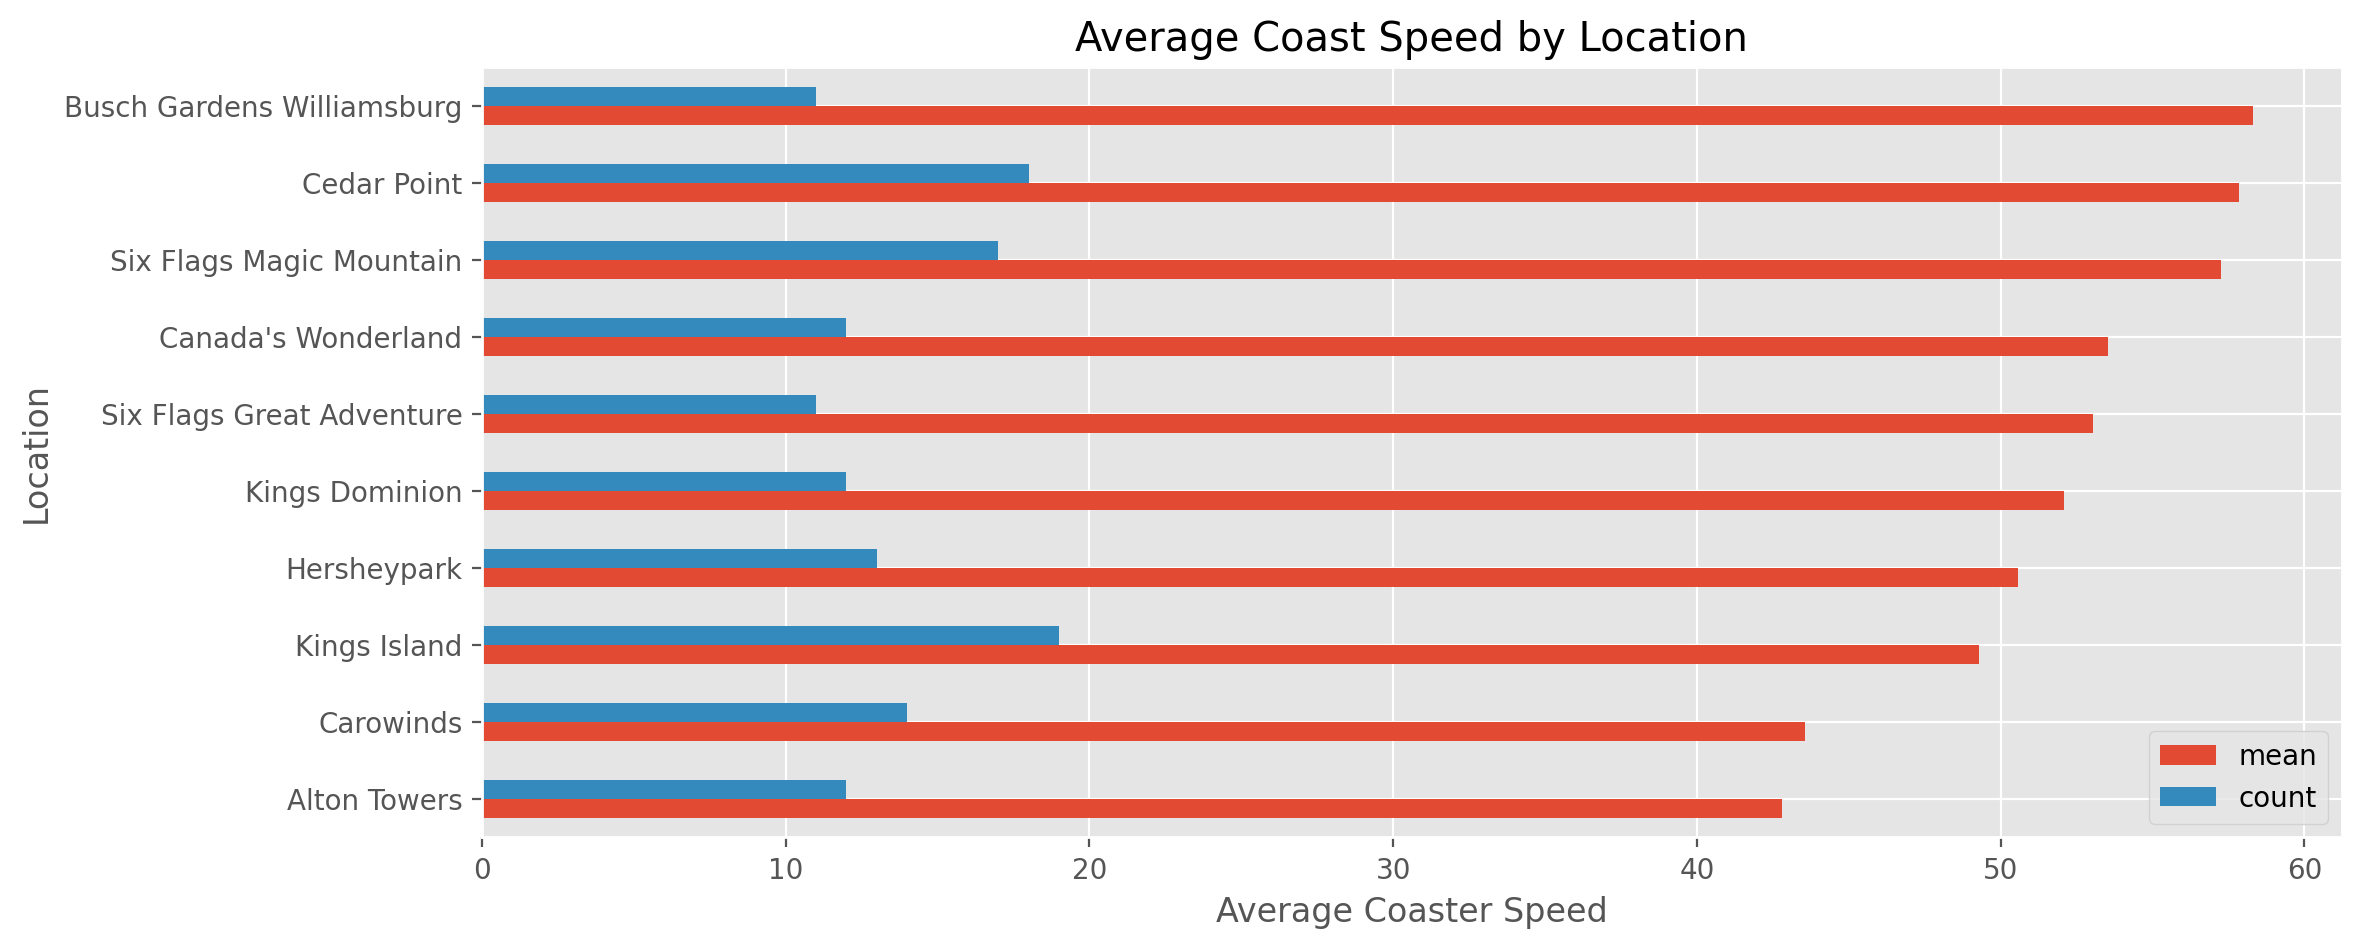

In [174]:

ax = df.query('Location != "Other"').groupby("Location")['Speed_MPH'].agg(['mean','count']).query('count > 10').sort_values('mean').plot(kind='barh',figsize=(12,5),title="Average Coast Speed by Location")

ax.set_xlabel('Average Coaster Speed')
plt.show()